# Part 3: ICA
 **_TABLE OF CONTENT_**
     0. General Functions
     1. AAPL
        1.1 ICA
        1.3 SVM
        1.4 LR
        1.5 MLP
     2. AMZN
     3. GOOG
     4. FB
     5. NFLX

In [1]:
from datetime import date
import pandas as pd
import numpy as np
from preprocessing import create_basetable
from sklearn.decomposition import FastICA
from helpFunctions import *

## 0. GENERAL FUNCTIONS

Initialize some variables for later use throughout notebook

Time window according to 70-30 split

In [2]:
start_independent = date(2020, 3, 22)
end_independent= date(2020, 11, 30)
start_dependent = date(2020, 12, 1)

### 1. Apple
#### 1.1 Data Retrieval and ICA
Retrieve the training and test set for APPLE stock

In [3]:
%%time
tck = 'AAPL'
# Retrieved scaled
# train and test set for specified stock symbol
scaled_train_X, scaled_test_X, train_y, test_y = create_basetable(tck,
                                                                  start_independent= start_independent,
                                                                  end_independent= end_independent,
                                                                  start_dependent= start_dependent)

Wall time: 46.9 s


Show the initial shape of the training set:

In [4]:
scaled_train_X.shape

(152, 136)

Check the balance in training set of observations per category

In [5]:
buy_sell_observations(train_y, test_y)

--------Training set--------
Total number of observations:  152
Number of sell observations :  63
Number of buy observations :  89

--------Test set--------
Total number of observations:  71
Number of sell observations :  40
Number of buy observations :  31


In [6]:
%%time
ica = FastICA(n_components= 26, random_state=123)
ica.fit(scaled_train_X)
ica_train_X = ica.transform(scaled_train_X)
ica_test_X = ica.transform(scaled_test_X)


Wall time: 502 ms


#### 1.3 SVM

[LibSVM]AUC: 0.4834677419354839
              precision    recall  f1-score   support

           0       0.53      0.23      0.32        40
           1       0.43      0.74      0.54        31

    accuracy                           0.45        71
   macro avg       0.48      0.48      0.43        71
weighted avg       0.48      0.45      0.41        71



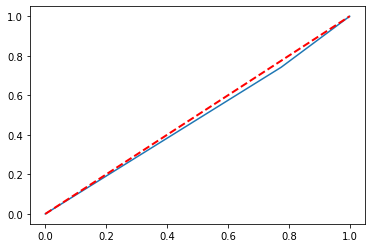

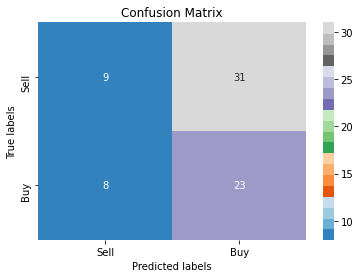

In [7]:
svmClassifier(ica_train_X, train_y, ica_test_X, test_y)

#### 1.4 LR


[LibLinear]AUC: 0.5012096774193548
              precision    recall  f1-score   support

           0       0.57      0.33      0.41        40
           1       0.44      0.68      0.53        31

    accuracy                           0.48        71
   macro avg       0.50      0.50      0.47        71
weighted avg       0.51      0.48      0.46        71



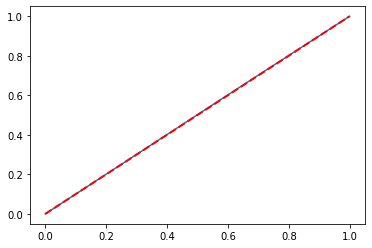

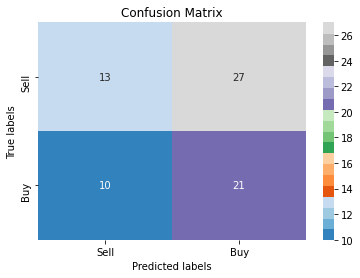

In [8]:
lrClassifier(ica_train_X,ica_test_X, train_y, test_y)

#### 1.4 MLP


AUC: 0.5415322580645161
              precision    recall  f1-score   support

           0       0.59      0.82      0.69        40
           1       0.53      0.26      0.35        31

    accuracy                           0.58        71
   macro avg       0.56      0.54      0.52        71
weighted avg       0.56      0.58      0.54        71



c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


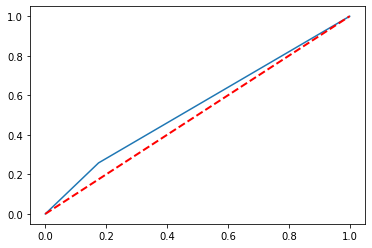

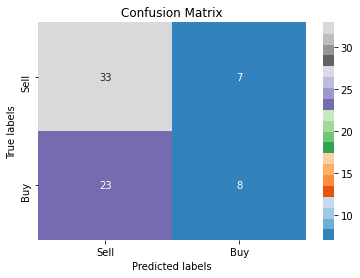

In [9]:
mlpClassifier(ica_train_X,ica_test_X, train_y, test_y)

### 2. AMZN
#### 2.1 Data Retrieval and ICA

In [10]:
%%time
tck = 'AMZN'
# Retrieved scaled train and test set for specified stock symbol
scaled_train_X, scaled_test_X, train_y, test_y = create_basetable(tck, start_independent= start_independent ,
                                                                  end_independent= end_independent,
                                                                  start_dependent= start_dependent)

Wall time: 43.7 s


In [11]:
buy_sell_observations(train_y, test_y)

--------Training set--------
Total number of observations:  152
Number of sell observations :  61
Number of buy observations :  91

--------Test set--------
Total number of observations:  71
Number of sell observations :  36
Number of buy observations :  35


Apply ICA

In [12]:
%%time
ica = FastICA(n_components= 26, random_state=123)
ica.fit(scaled_train_X)
ica_train_X = ica.transform(scaled_train_X)
ica_test_X = ica.transform(scaled_test_X)

Wall time: 151 ms


#### 2.3 SVM

[LibSVM]AUC: 0.44285714285714284
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.46      0.89      0.61        35

    accuracy                           0.44        71
   macro avg       0.23      0.44      0.30        71
weighted avg       0.23      0.44      0.30        71



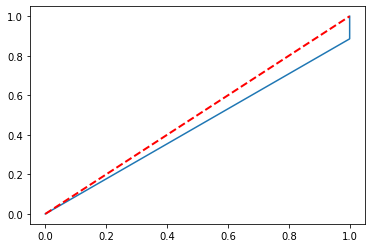

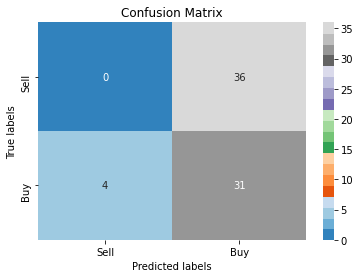

In [13]:
svmClassifier(ica_train_X, train_y, ica_test_X, test_y)

#### 2.4 LR

[LibLinear]AUC: 0.5555555555555556
              precision    recall  f1-score   support

           0       1.00      0.11      0.20        36
           1       0.52      1.00      0.69        35

    accuracy                           0.55        71
   macro avg       0.76      0.56      0.44        71
weighted avg       0.76      0.55      0.44        71



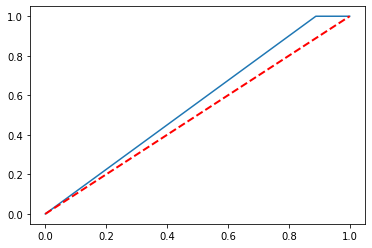

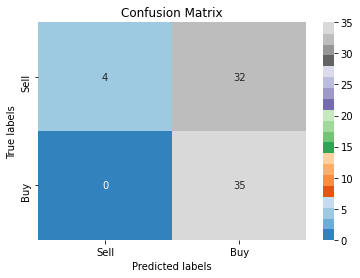

In [14]:
lrClassifier(ica_train_X,ica_test_X, train_y, test_y)

#### 1.4 MLP

c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


AUC: 0.5341269841269841
              precision    recall  f1-score   support

           0       0.54      0.61      0.57        36
           1       0.53      0.46      0.49        35

    accuracy                           0.54        71
   macro avg       0.53      0.53      0.53        71
weighted avg       0.53      0.54      0.53        71



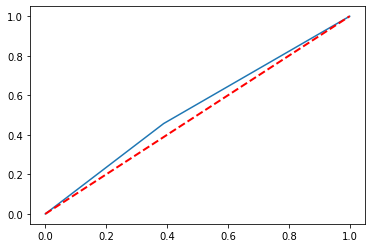

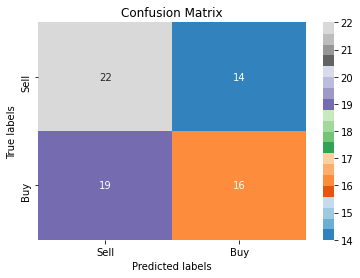

In [15]:
mlpClassifier(ica_train_X,ica_test_X, train_y, test_y)

### 3. Google
#### 3.1 Data Retrieval and ICA

In [16]:
%%time
tck = 'GOOG'
# Retrieved scaled train and test set for specified stock symbol
scaled_train_X, scaled_test_X, train_y, test_y = create_basetable(tck, start_independent= start_independent ,                                                                end_independent= end_independent,
                                                                  start_dependent= start_dependent)

Wall time: 42 s


In [17]:
buy_sell_observations(train_y, test_y)

--------Training set--------
Total number of observations:  152
Number of sell observations :  58
Number of buy observations :  94

--------Test set--------
Total number of observations:  71
Number of sell observations :  33
Number of buy observations :  38


In [18]:
%%time
ica = FastICA(n_components= 26, random_state=123)
ica.fit(scaled_train_X)
ica_train_X = ica.transform(scaled_train_X)
ica_test_X = ica.transform(scaled_test_X)

Wall time: 563 ms


c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


#### 3.3 SVM

c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

[LibSVM]AUC: 0.5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.54      1.00      0.70        38

    accuracy                           0.54        71
   macro avg       0.27      0.50      0.35        71
weighted avg       0.29      0.54      0.37        71



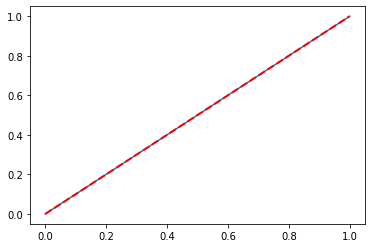

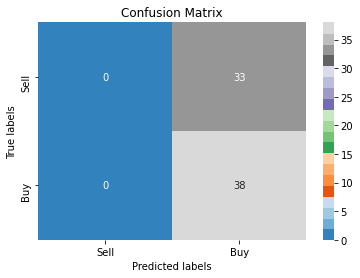

In [19]:
svmClassifier(ica_train_X, train_y, ica_test_X, test_y)

#### 3.4 LR

[LibLinear]AUC: 0.5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.54      1.00      0.70        38

    accuracy                           0.54        71
   macro avg       0.27      0.50      0.35        71
weighted avg       0.29      0.54      0.37        71



c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

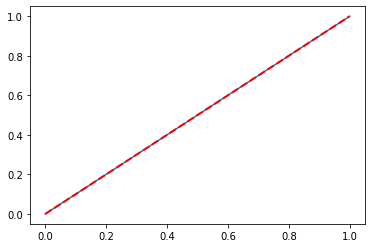

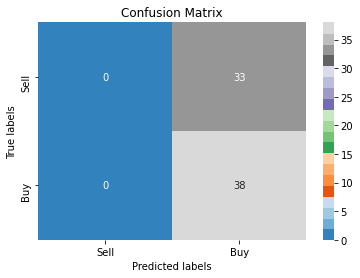

In [20]:
lrClassifier(ica_train_X,ica_test_X, train_y, test_y)

#### 3.4 MLP

AUC: 0.483652312599681
              precision    recall  f1-score   support

           0       0.42      0.15      0.22        33
           1       0.53      0.82      0.64        38

    accuracy                           0.51        71
   macro avg       0.47      0.48      0.43        71
weighted avg       0.47      0.51      0.45        71



c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


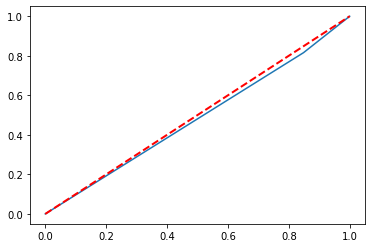

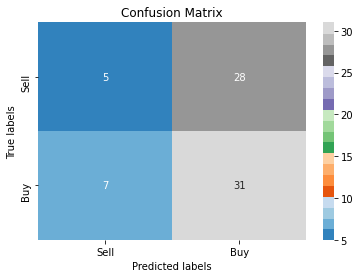

In [21]:
mlpClassifier(ica_train_X,ica_test_X, train_y, test_y)

### 4. Facebook
#### 4.1 Data Retrieval and ICA

In [22]:
%%time
tck = 'FB'
# Retrieved scaled train and test set for specified stock symbol
scaled_train_X, scaled_test_X, train_y, test_y = create_basetable(tck, start_independent= start_independent ,
                                                                  end_independent= end_independent,
                                                                  start_dependent= start_dependent)

Wall time: 36 s


In [23]:
buy_sell_observations(train_y, test_y)

--------Training set--------
Total number of observations:  152
Number of sell observations :  63
Number of buy observations :  89

--------Test set--------
Total number of observations:  71
Number of sell observations :  36
Number of buy observations :  35


In [24]:
%%time
ica = FastICA(n_components= 26, random_state=123)
ica.fit(scaled_train_X)
ica_train_X = ica.transform(scaled_train_X)
ica_test_X = ica.transform(scaled_test_X)

Wall time: 311 ms


#### 4.3 SVM

[LibSVM]AUC: 0.5531746031746032
              precision    recall  f1-score   support

           0       0.62      0.28      0.38        36
           1       0.53      0.83      0.64        35

    accuracy                           0.55        71
   macro avg       0.58      0.55      0.51        71
weighted avg       0.58      0.55      0.51        71



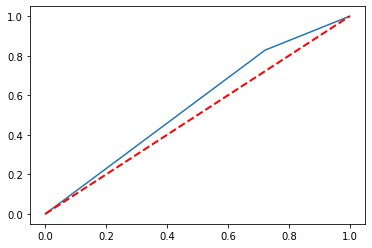

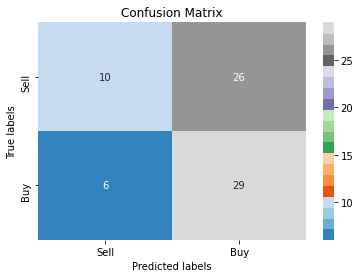

In [25]:
svmClassifier(ica_train_X, train_y, ica_test_X, test_y)

#### 4.4 LR


[LibLinear]AUC: 0.4837301587301588
              precision    recall  f1-score   support

           0       0.45      0.14      0.21        36
           1       0.48      0.83      0.61        35

    accuracy                           0.48        71
   macro avg       0.47      0.48      0.41        71
weighted avg       0.47      0.48      0.41        71



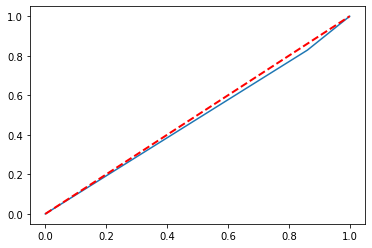

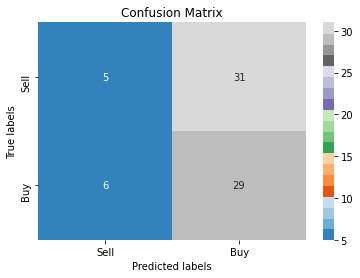

In [26]:
lrClassifier(ica_train_X,ica_test_X, train_y, test_y)

#### 4.4 MLP

AUC: 0.5210317460317461
              precision    recall  f1-score   support

           0       0.53      0.53      0.53        36
           1       0.51      0.51      0.51        35

    accuracy                           0.52        71
   macro avg       0.52      0.52      0.52        71
weighted avg       0.52      0.52      0.52        71



c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


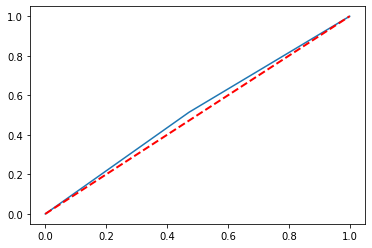

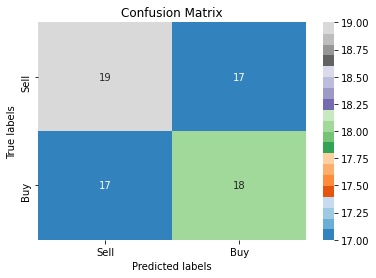

In [27]:
mlpClassifier(ica_train_X,ica_test_X, train_y, test_y)

### 5. Netflix
#### 5.1 Data Retrieval and ICA

In [28]:
%%time
tck = 'NFLX'
# Retrieved scaled train and test set for specified stock symbol
scaled_train_X, scaled_test_X, train_y, test_y = create_basetable(tck, start_independent= start_independent ,
                                                                  end_independent= end_independent,
                                                                  start_dependent= start_dependent)

Wall time: 39.1 s


In [29]:
buy_sell_observations(train_y, test_y)

--------Training set--------
Total number of observations:  151
Number of sell observations :  69
Number of buy observations :  82

--------Test set--------
Total number of observations:  71
Number of sell observations :  37
Number of buy observations :  34


In [30]:
%%time
ica = FastICA(n_components= 26, random_state=123)
ica.fit(scaled_train_X)
ica_train_X = ica.transform(scaled_train_X)
ica_test_X = ica.transform(scaled_test_X)

Wall time: 314 ms


#### 5.3 SVC

[LibSVM]AUC: 0.5166931637519872
              precision    recall  f1-score   support

           0       0.53      0.62      0.57        37
           1       0.50      0.41      0.45        34

    accuracy                           0.52        71
   macro avg       0.52      0.52      0.51        71
weighted avg       0.52      0.52      0.52        71



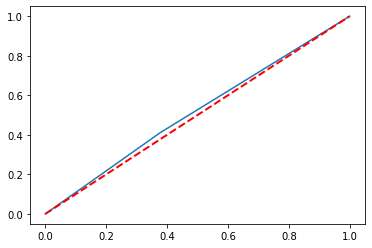

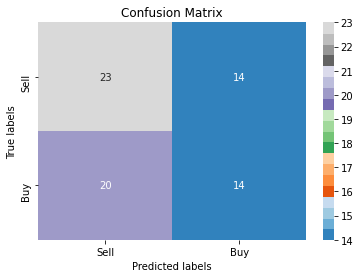

In [31]:
svmClassifier(ica_train_X, train_y, ica_test_X, test_y)

#### 5.4 LR


[LibLinear]AUC: 0.5997615262321144
              precision    recall  f1-score   support

           0       0.68      0.41      0.51        37
           1       0.55      0.79      0.65        34

    accuracy                           0.59        71
   macro avg       0.62      0.60      0.58        71
weighted avg       0.62      0.59      0.58        71



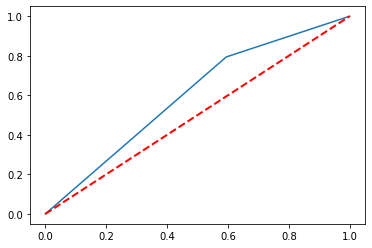

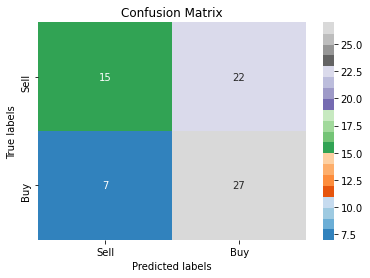

In [32]:
lrClassifier(ica_train_X,ica_test_X, train_y, test_y)

#### 5.4 MLP


AUC: 0.5313990461049284
              precision    recall  f1-score   support

           0       0.55      0.62      0.58        37
           1       0.52      0.44      0.48        34

    accuracy                           0.54        71
   macro avg       0.53      0.53      0.53        71
weighted avg       0.53      0.54      0.53        71



c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


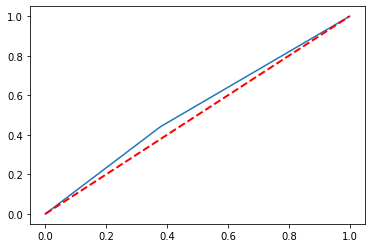

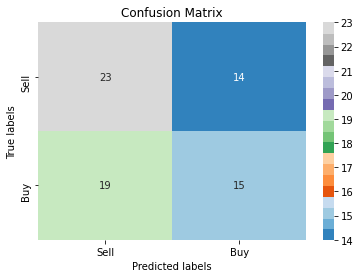

In [33]:
mlpClassifier(ica_train_X,ica_test_X, train_y, test_y)